# KNN

In [4]:
import numpy as np
import pandas as pd

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder , LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,accuracy_score

In [6]:
df = pd.read_csv("./datasets/cancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
X = df.drop(columns=["diagnosis" , "id"])
y = df["diagnosis"]

In [8]:
numerical_features = X.select_dtypes(exclude=["object"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns
print(numerical_features)
print(categorical_features)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
Index([], dtype='object')


In [9]:
numerical_pipe = Pipeline([('impute' , SimpleImputer(strategy='mean')) , ('minMax' , MinMaxScaler())])
categorical_pipe = Pipeline([('impute', SimpleImputer(strategy='most_frequent')) , ('oe' , OneHotEncoder(handle_unknown='ignore'))])
preprocessing_pipe = ColumnTransformer([('numerical' , numerical_pipe , numerical_features) , 
#                                         ('categorical',categorical_pipe , categorical_features)
                                       ])
X = preprocessing_pipe.fit_transform(X)
y = LabelEncoder().fit_transform(y)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X , y , test_size=0.2,random_state=0)

In [11]:
model = KNeighborsClassifier(n_neighbors=5)


In [12]:
model.fit(X_train,y_train)
model.score(X_test , y_test)

0.9649122807017544

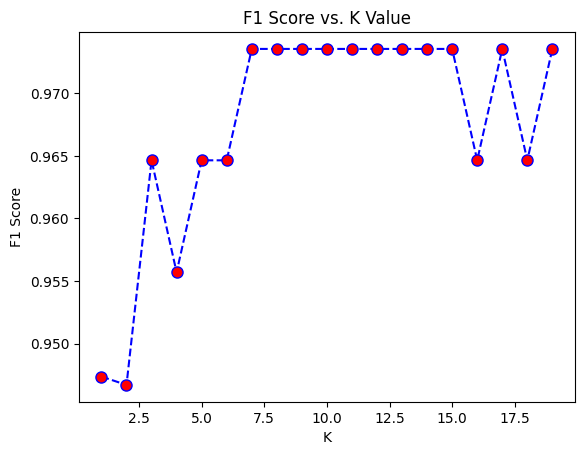

Optimal k value: 7


In [13]:
from sklearn.metrics import f1_score

f1s = []

n = 20

# Calculating f1 score for K values between 1 and n
for i in range(1, n):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes
    f1s.append(f1_score(y_test, pred_i, average="weighted"))

# Plotting the f1 scores against k values
plt.plot(range(1, n), f1s, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('F1 Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1 Score')
plt.show()

# Finding the optimal k value
optimal_k = np.argmax(f1s) + 1
print("Optimal k value:", optimal_k)


# SVM

In [14]:
from sklearn.svm import SVC

In [15]:
model = SVC(kernel='linear' , C = 1)
model.fit(X_train,y_train)
model.score(X_test , y_test)

0.9649122807017544

In [16]:
model = SVC(kernel='rbf' , C = 0.5)
model.fit(X_train,y_train)
model.score(X_test , y_test)

0.9824561403508771

# KNN - Using sci-kit learn

Accuracy on training set: 0.907
Accuracy on test set: 0.883


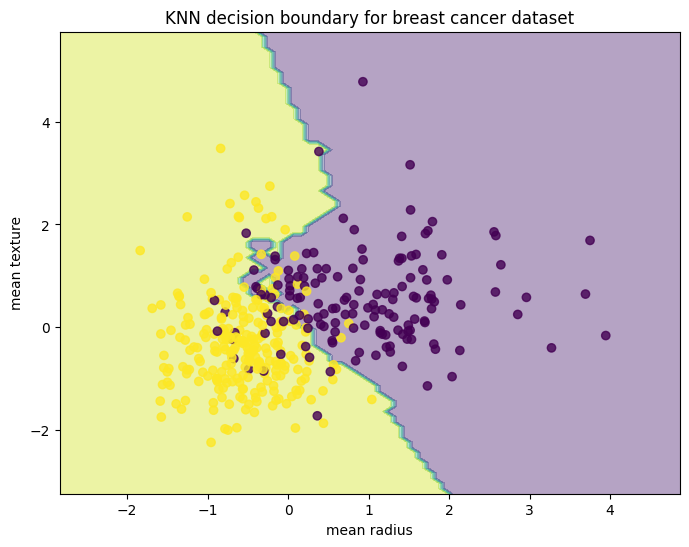

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# Step 3: Scale the dataset using the StandardScaler
scaler = StandardScaler()
# Step 3: Scale the dataset using the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.iloc[:, [0, 1]])
X_test_scaled = scaler.transform(X_test.iloc[:, [0, 1]])


# Step 4: Train the KNN classifier on the training data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Step 5: Evaluate the performance of the KNN classifier on the testing data
print("Accuracy on training set: {:.3f}".format(knn.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test_scaled, y_test)))

# print all columns of X_train_scaled

# Define the meshgrid for the decision boundary plot
xx, yy = np.meshgrid(
    np.arange(X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1, 0.1),
    np.arange(X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1, 0.1),
)


# Step 6: Plot the decision boundary for the KNN classifier
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary along with the training data
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, alpha=0.8)
plt.xlabel(X_train.columns[0])
plt.ylabel(X_train.columns[1])
plt.title("KNN decision boundary for breast cancer dataset")
plt.show()

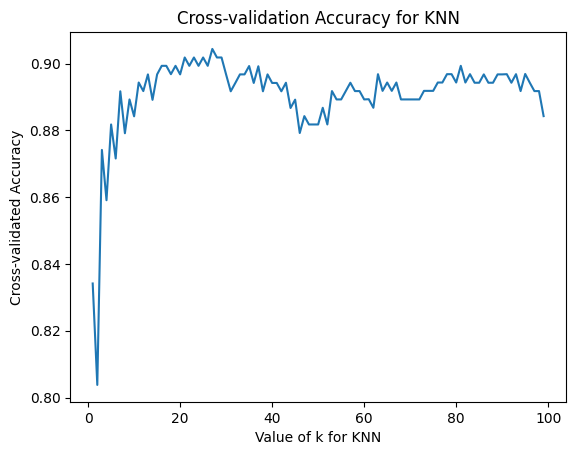

The optimal number of neighbors is 27


In [18]:
# Step 7: Find the optimal value of k using cross-validation
from sklearn.model_selection import cross_val_score
k_range = range(1, 100)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # 10-fold cross-validation
    score = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    scores.append(score.mean())

# Step 8: Plot the accuracy scores for different values of k
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-validated Accuracy')
plt.title('Cross-validation Accuracy for KNN')
plt.show()

# Step 9: Find the k value with the highest accuracy score
optimal_k = k_range[scores.index(max(scores))]
print("The optimal number of neighbors is {}".format(optimal_k))

# SVM - Using sci-kit learn

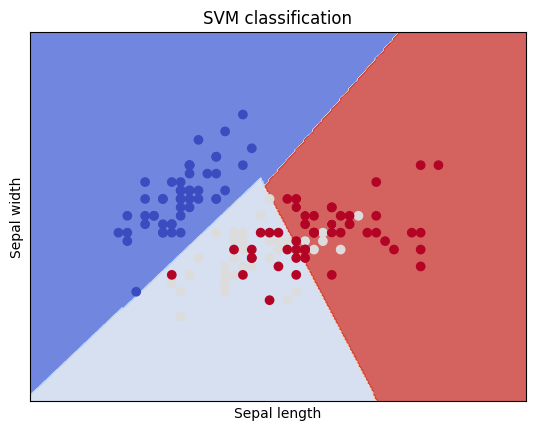

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# Load iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# Train SVM
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

# Create meshgrid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Plot the SVM margin and decision surface
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVM classification')
plt.show()
